In [241]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# This query is to define for the subsequent queries

# Read the csv file
sg_general = pd.read_csv('parliamentary-general-election-results-by-candidate.csv', sep=",", encoding='cp1252')
sg_by = pd.read_csv('parliamentary-by-election-results-by-candidate.csv', sep=",", encoding='cp1252')
sg_pst = pd.read_csv('presidential-election-results.csv', sep=",", encoding='cp1252')
# Exclude na values
sg_elect = sg_general[sg_general.vote_count != 'na']
sg_by = sg_by[sg_by.vote_count != 'na']
sg_pst = sg_pst[sg_pst.vote_count != 'na']
# Exclude data before Singapore independence
sg_elect = sg_elect[~sg_elect['year'].isin([1955,1959,1963])]
sg_by = sg_by[~sg_by['year'].isin([1957,1961])]
# Exclude columns not revelant for this assignment
sg_elect = sg_elect.drop(columns=['candidates'], axis=1)
sg_by = sg_by.drop(columns=['candidates'], axis=1)
# convert from object to integer
sg_elect['vote_count'] = sg_elect.vote_count.astype(int)
sg_elect['vote_percentage'] = sg_elect.vote_percentage.astype(float)
sg_elect['candidates'] = sg_elect.vote_percentage.astype(str)
sg_by['vote_count'] = sg_by.vote_count.astype(int)
sg_by['vote_percentage'] = sg_by.vote_percentage.astype(float)
sg_pst['vote_count'] = sg_pst.vote_count.astype(int)
sg_pst['vote_percentage'] = sg_pst.vote_percentage.astype(float)
# Multiply 100 for vote_percentage
sg_elect['vote_percentage'] = pd.Series(["{0:.2f}%".format(val * 100) 
                                         for val in sg_elect['vote_percentage']], index = sg_elect.index)
sg_by['vote_percentage'] = pd.Series(["{0:.2f}%".format(val * 100) 
                                         for val in sg_by['vote_percentage']], index = sg_by.index)
sg_pst['vote_percentage'] = pd.Series(["{0:.2f}%".format(val * 100) 
                                         for val in sg_pst['vote_percentage']], index = sg_pst.index)
# Correcting data to reflect data accuration
sg_elect.at[1485,'constituency_type'] = 'GRC'
sg_elect.at[1486,'constituency_type'] = 'GRC'
# Filter data from 2011 to 2020 for modern days analysis
sg_elect1 = sg_elect[sg_elect['year'].isin([1991,1997,2001,2006,2011,2015,2020])]
sg_elect2020 = sg_elect[sg_elect['year'].isin([2020])]
sg_elect2 = sg_by[~sg_by['party'].isin(['UNF','BS','UF'])]
sg_elect3 = sg_by[sg_by['party'].isin(['WP','PAP'])]
sg_pst = sg_pst[sg_pst['year'].isin([1993, 2011])]

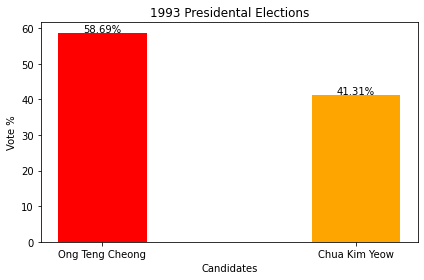

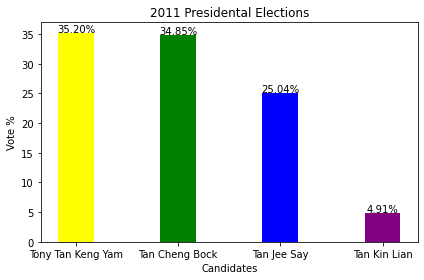

In [231]:
# Presidental Elections
# 1993
sg_pst_1993 = sg_pst[sg_pst['year'].isin([1993])]
sg_pst_1993 = sg_pst_1993.sort_values(by='vote_count',ascending=False)
sg_pst_1993_pct = sg_pst_1993.vote_count.div(sg_pst_1993.vote_count.sum(0), axis=0)*100

height = 0.35
x = ['Ong Teng Cheong', 'Chua Kim Yeow']
colors_list = ['Red','Orange']
fig, ax = plt.subplots()

pps = ax.bar(x, sg_pst_1993_pct, height, align='center',color=colors_list)

for p in pps:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{:.2f}%".format(height),
      ha='center')

plt.xlabel('Candidates')
plt.ylabel('Vote %')
plt.title('1993 Presidental Elections')
plt.tight_layout()
plt.show()

# 2011
sg_pst_2011 = sg_pst[sg_pst['year'].isin([2011])]
sg_pst_2011 = sg_pst_2011.sort_values(by='vote_count',ascending=False)
sg_pst_2011_pct = sg_pst_2011.vote_count.div(sg_pst_2011.vote_count.sum(0), axis=0)*100

height = 0.35
colors_list = ['Yellow','Green', 'Blue', 'Purple']
x = ['Tony Tan Keng Yam', 'Tan Cheng Bock', 'Tan Jee Say', 'Tan Kin Lian']
fig, ax = plt.subplots()

pps = ax.bar(x, sg_pst_2011_pct, height, align='center',color=colors_list)

for p in pps:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{:.2f}%".format(height),
      ha='center')
    
plt.xlabel('Candidates')
plt.ylabel('Vote %')
plt.title('2011 Presidental Elections')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

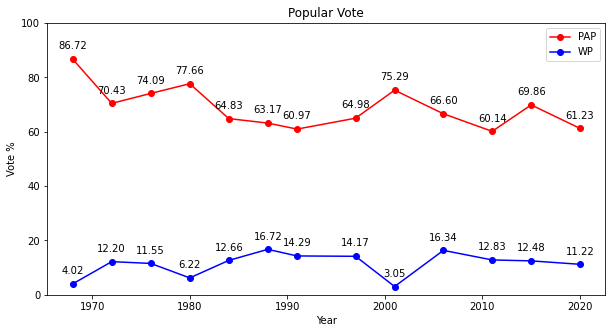

In [46]:
# Popular Votes

# Singapore Total Votes
sg_years = np.unique(sg_elect['year'])
popular_sg = []
for i in sg_years:
    popular_sg.append(sum(sg_elect[sg_elect['year']==i]['vote_count']))

# PAP Total Votes
sg_pap = sg_elect[sg_elect.party == 'PAP']
years = np.unique(sg_pap['year'])
popular_pap = []
for i in years:
    popular_pap.append(sum(sg_pap[sg_pap['year']==i]['vote_count']))
# PAP %
percent_pap = np.divide(popular_pap, popular_sg)*100

# WP Total Votes
sg_wp = sg_elect[sg_elect.party == 'WP']
years = np.unique(sg_wp['year'])
popular_wp = []
for i in years:
    popular_wp.append(sum(sg_wp[sg_wp['year']==i]['vote_count']))
# WP %
percent_wp = np.divide(popular_wp, popular_sg)*100


plt.clf()
plt.figure(figsize=(10,5))
plt.plot(years, percent_pap, 'ro-', label='PAP')
plt.plot(years, percent_wp, 'bo-', label='WP')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Vote %')
plt.title('Popular Vote')
axes = plt.gca()
axes.set_ylim([0,100])

for x,y in zip(years,percent_pap):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
for x,y in zip(years,percent_wp):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

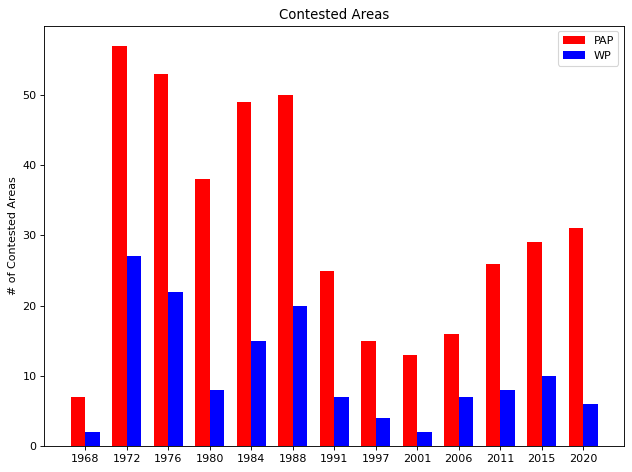

In [24]:
# Contested constituencies

# PAP Contested Areas
sg_pap = sg_elect[sg_elect.party == 'PAP']
years = np.unique(sg_pap['year'])
pap_area = []
for i in years:
    pap_area.append((sg_pap[sg_pap['year']==i]['party']).count())
    
# WP Contested Areas
sg_wp = sg_elect[sg_elect.party == 'WP']
years = np.unique(sg_wp['year'])
wp_area = []
for i in years:
    wp_area.append((sg_wp[sg_wp['year']==i]['party']).count())
    
plt.figure(figsize=(8, 6), dpi=80)
x = np.arange(len(years))  # the label locations
width = 0.35  # the width of the bars
rects1 = plt.bar(x - width/2, pap_area, width, label='PAP', color='red')
rects2 = plt.bar(x + width/2, wp_area, width, label='WP', color='blue')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.xticks(x,labels=years)
plt.ylabel('# of Contested Areas')
plt.title('Contested Areas')
plt.legend()
plt.tight_layout()
plt.show()

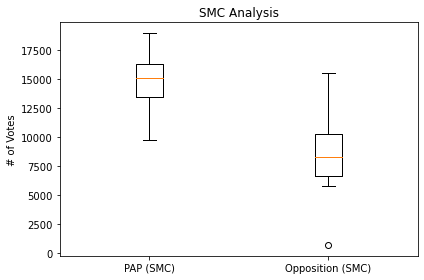

In [232]:
smc = sg_elect2020[sg_elect2020['constituency_type']=='SMC']
grc = sg_elect2020[sg_elect2020['constituency_type']=='GRC']

pap_smc = smc[smc['party']=='PAP']['vote_count']
opposition_smc = smc[smc['party']!='PAP']['vote_count']

y = [pap_smc, opposition_smc]
smc_labels = ['PAP (SMC)', 'Opposition (SMC)']

plt.boxplot(y, labels=smc_labels)
plt.ylabel('# of Votes')
plt.title('SMC Analysis')
plt.tight_layout()
plt.show()

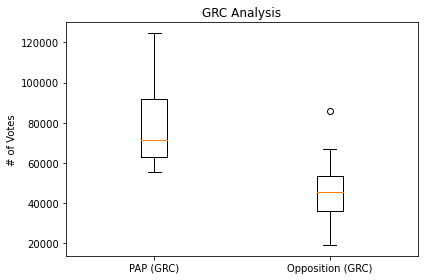

In [233]:
pap_grc = grc[grc['party']=='PAP']['vote_count']
opposition_grc = grc[grc['party']!='PAP']['vote_count']

y = [pap_grc, opposition_grc]
smc_labels = ['PAP (GRC)', 'Opposition (GRC)']

plt.boxplot(y, labels=smc_labels)
plt.ylabel('# of Votes')
plt.title('GRC Analysis')
plt.tight_layout()
plt.show()

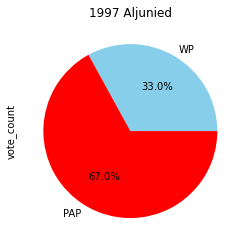

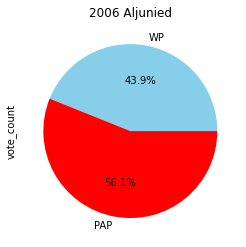

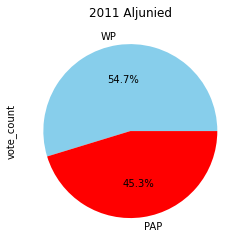

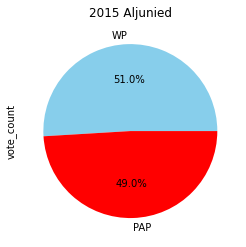

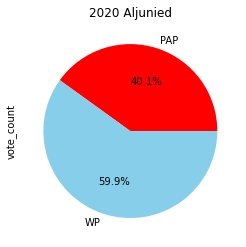

In [130]:
#2011, 2015, 2020

sg_al = sg_elect1[sg_elect1.constituency == 'Aljunied']
sg_al_97 = sg_al[sg_al.year == 1997]
sg_al_06 = sg_al[sg_al.year == 2006]
sg_al_11 = sg_al[sg_al.year == 2011]
sg_al_15 = sg_al[sg_al.year == 2015]
sg_al_20 = sg_al[sg_al.year == 2020]

plot = sg_al_97.plot.pie(y='vote_count', autopct='%1.1f%%', legend=None, labels=['WP','PAP'], 
                         colors=['skyblue', 'red'], title='1997 Aljunied')
plot = sg_al_06.plot.pie(y='vote_count', autopct='%1.1f%%', legend=None, labels=['WP','PAP'], 
                         colors=['skyblue', 'red'], title='2006 Aljunied')
plot = sg_al_11.plot.pie(y='vote_count', autopct='%1.1f%%', legend=None, labels=['WP','PAP'], 
                         colors=['skyblue', 'red'], title='2011 Aljunied')
plot = sg_al_15.plot.pie(y='vote_count', autopct='%1.1f%%', legend=None, labels=['WP','PAP'], 
                         colors=['skyblue', 'red'], title='2015 Aljunied')
plot = sg_al_20.plot.pie(y='vote_count', autopct='%1.1f%%', legend=None, labels=['PAP','WP'], 
                         colors=['red', 'skyblue'], title='2020 Aljunied')
    

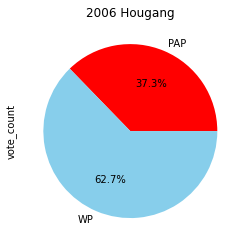

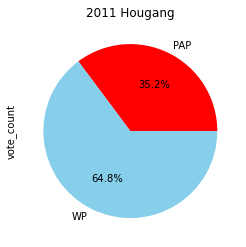

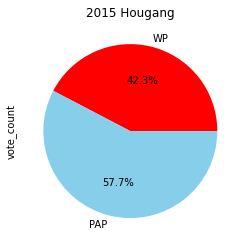

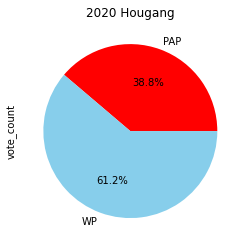

In [131]:
sg_hg = sg_elect1[sg_elect1.constituency == 'Hougang']
sg_hg_06 = sg_hg[sg_hg.year == 2006]
sg_hg_11 = sg_hg[sg_hg.year == 2011]
sg_hg_15 = sg_hg[sg_hg.year == 2015]
sg_hg_20 = sg_hg[sg_hg.year == 2020]

plot = sg_hg_06.plot.pie(y='vote_count', autopct='%1.1f%%', legend=None, labels=['PAP','WP'], 
                         colors=['red', 'skyblue'], title='2006 Hougang')
plot = sg_hg_11.plot.pie(y='vote_count', autopct='%1.1f%%', legend=None, labels=['PAP','WP'], 
                         colors=['red', 'skyblue'], title='2011 Hougang')
plot = sg_hg_15.plot.pie(y='vote_count', autopct='%1.1f%%', legend=None, labels=['WP','PAP'], 
                         colors=['red', 'skyblue'], title='2015 Hougang')
plot = sg_hg_20.plot.pie(y='vote_count', autopct='%1.1f%%', legend=None, labels=['PAP','WP'], 
                         colors=['red', 'skyblue'], title='2020 Hougang')

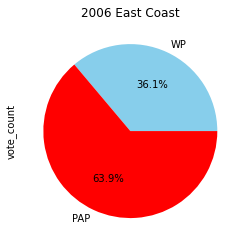

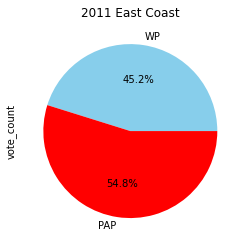

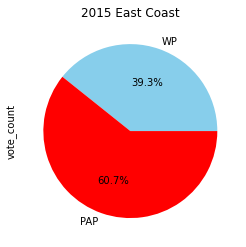

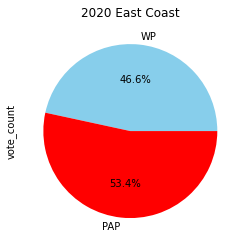

In [132]:
#2011, 2015, 2020

sg_ec = sg_elect1[sg_elect1.constituency == 'East Coast']
sg_ec_06 = sg_ec[sg_ec.year == 2006]
sg_ec_11 = sg_ec[sg_ec.year == 2011]
sg_ec_15 = sg_ec[sg_ec.year == 2015]
sg_ec_20 = sg_ec[sg_ec.year == 2020]

plot = sg_ec_06.plot.pie(y='vote_count', autopct='%1.1f%%', legend=None, labels=['WP','PAP'], 
                         colors=['skyblue', 'red'], title='2006 East Coast')
plot = sg_ec_11.plot.pie(y='vote_count', autopct='%1.1f%%', legend=None, labels=['WP','PAP'], 
                         colors=['skyblue', 'red'], title='2011 East Coast')
plot = sg_ec_15.plot.pie(y='vote_count', autopct='%1.1f%%', legend=None, labels=['WP','PAP'], 
                         colors=['skyblue', 'red'], title='2015 East Coast')
plot = sg_ec_20.plot.pie(y='vote_count', autopct='%1.1f%%', legend=None, labels=['WP','PAP'], 
                         colors=['skyblue', 'red'], title='2020 East Coast')

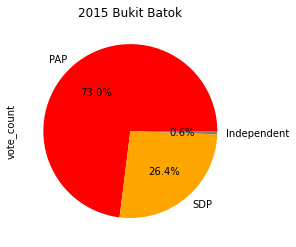

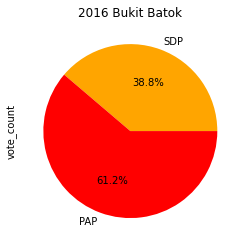

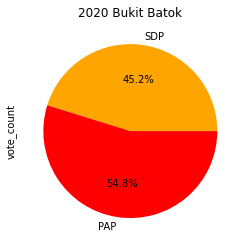

In [123]:
# by election comparison

sg_bb = sg_elect1[sg_elect1.constituency == 'Bukit Batok']
sg_bb_by = sg_by[sg_by.constituency == 'Bukit Batok']
sg_bb_15 = sg_bb[sg_bb.year == 2015]
sg_bb_16 = sg_bb_by[sg_bb_by.year == 2016]
sg_bb_20 = sg_bb[sg_bb.year == 2020]

plot = sg_bb_15.plot.pie(y='vote_count', autopct='%1.1f%%', legend=None, labels=['PAP','SDP','Independent'], 
                         colors=['red', 'orange','grey'], title='2015 Bukit Batok')
plot = sg_bb_16.plot.pie(y='vote_count', autopct='%1.1f%%', legend=None, labels=['SDP','PAP'], 
                         colors=['orange', 'red'], title='2016 Bukit Batok')
plot = sg_bb_20.plot.pie(y='vote_count', autopct='%1.1f%%', legend=None, labels=['SDP','PAP'], 
                         colors=['orange', 'red'], title='2020 Bukit Batok')

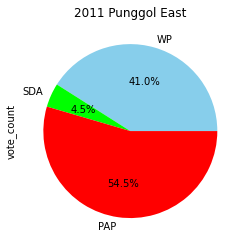

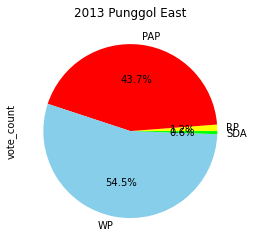

In [137]:
sg_pe = sg_elect1[sg_elect1.constituency == 'Punggol East']
sg_pe_by = sg_by[sg_by.constituency == 'Punggol East']
sg_pe_11 = sg_pe[sg_pe.year == 2011]
sg_pe_13 = sg_pe_by[sg_pe_by.year == 2013]

plot = sg_pe_11.plot.pie(y='vote_count', autopct='%1.1f%%', legend=None, labels=['WP','SDA','PAP'], 
                         colors=['skyblue', 'lime','red'], title='2011 Punggol East')
plot = sg_pe_13.plot.pie(y='vote_count', autopct='%1.1f%%', legend=None, labels=['RP','PAP','WP', 'SDA'], 
                         colors=['yellow', 'red', 'skyblue', 'lime'], title='2013 Punggol East')

,year,constituency,constituency_type,party,vote_count,vote_percentage
43,1979,Anson,na,PAP,8127,86.21%
44,1979,Anson,na,UF,1300,13.79%
55,1981,Anson,na,UPF,131,0.97%
56,1981,Anson,na,WP,7012,51.93%
57,1981,Anson,na,PAP,6359,47.10%


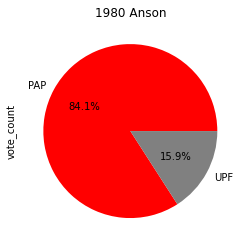

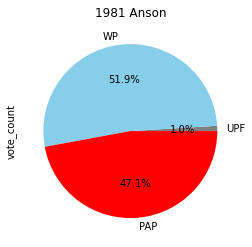

In [240]:
sg_a = sg_elect[sg_elect.constituency == 'Anson']
sg_a_by = sg_by[sg_by.constituency == 'Anson']
sg_a_80 = sg_a[sg_a.year == 1980]
sg_a_81 = sg_a_by[sg_a_by.year == 1981]

plot = sg_a_80.plot.pie(y='vote_count', autopct='%1.1f%%', legend=None, labels=['PAP','UPF'], 
                         colors=['red', 'grey','red'], title='1980 Anson')
plot = sg_a_81.plot.pie(y='vote_count', autopct='%1.1f%%', legend=None, labels=['UPF','WP','PAP'], 
                         colors=['grey', 'skyblue', 'red'], title='1981 Anson')